In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_json('newsdataset.json',lines=True)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [4]:
dataset.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [5]:
categories = dataset.groupby('category')
print('total categories: {}'.format(categories.ngroups))
print(categories.size())

total categories: 41
category
ARTS               1509
ARTS & CULTURE     1339
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
CULTURE & ARTS     1030
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE              2254
STYLE & BEAUTY     9649
TASTE              2096
TECH               2082
THE WORLDPOST      3664
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         2177
WORLDPOST 

In [6]:
dataset['category'] = dataset['category'].replace("STYLE","STYLE & BEAUTY")
dataset['category'] = dataset['category'].replace("ARTS","ARTS & CULTURE")
dataset['category'] = dataset['category'].replace("ARTS & CULTURE","CULTURE & ARTS")
dataset['category'] = dataset['category'].replace("HEALTHY LIVING","HOME & LIVING")
dataset['category'] = dataset['category'].replace("THE WORLDPOST","WORLDPOST")

In [7]:
categories = dataset.groupby('category')
print('total categories: {}'.format(categories.ngroups))
print(categories.size())

total categories: 36
category
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
CULTURE & ARTS     3878
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HOME & LIVING     10889
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE & BEAUTY    11903
TASTE              2096
TECH               2082
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          6243
dtype: int64


In [8]:
dataset_cp = dataset.copy()

In [9]:
dataset_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [10]:
dataset_cp['headline'] = dataset_cp['headline'].str.lower()

In [11]:
dataset_cp.head()

,category,headline,authors,link,short_description,date
0,CRIME,there were 2 mass shootings in texas last week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,will smith joins diplo and nicky jam for the 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,hugh grant marries for the first time at age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,jim carrey blasts 'castrato' adam schiff and d...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,julianna margulies uses donald trump poop bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NIRANJAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [14]:
for i in range(len(dataset_cp["headline"])):
    string = ""
    for word in dataset_cp["headline"][i].split():
        ss = ("".join(e for e in word if e.isalnum()))
        if not ss in stop:
          string += ss + " "  
    dataset_cp.at[i,"headline"] = string.strip()

In [15]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NIRANJAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NIRANJAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
for i in range(len(dataset_cp['headline'])):
    string = ""
    for w in word_tokenize(dataset_cp['headline'][i]):
        string += lemmatizer.lemmatize(w,pos='v') + " "
    dataset_cp.at[i,'headline'] = string.strip()

In [17]:
dataset_cp.head()

,category,headline,authors,link,short_description,date
0,CRIME,2 mass shoot texas last week 1 tv,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,smith join diplo nicky jam 2018 world cup offi...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,hugh grant marry first time age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,jim carrey blast castrato adam schiff democrat...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,julianna margulies use donald trump poop bag p...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [18]:
dataset_cp.sample(frac=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset_cp['headline'],dataset_cp['category'],test_size=0.20,random_state = 0)


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1,4))
tfidfTrain = tfidfVectorizer.fit_transform(x_train)
tfidfTest = tfidfVectorizer.transform(x_test)

In [20]:
print(tfidfTrain.shape)

(160682, 1759587)


In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
nbClassifiertfidf = MultinomialNB(alpha =0.01)
nbClassifiertfidf.fit(tfidfTrain,y_train)
pred = nbClassifiertfidf.predict(tfidfTest)



In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred,y_test))

0.5501979039605686


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(ngram_range=(1,4),stop_words='english')

countTrain = countVectorizer.fit_transform(x_train)
countTest = countVectorizer.transform(x_test)

In [24]:
nbClassifier = MultinomialNB(alpha=0.05)
nbClassifier.fit(countTrain,y_train)
preds = nbClassifier.predict(countTest)

In [25]:
print(accuracy_score(preds,y_test))

0.5725772323317816


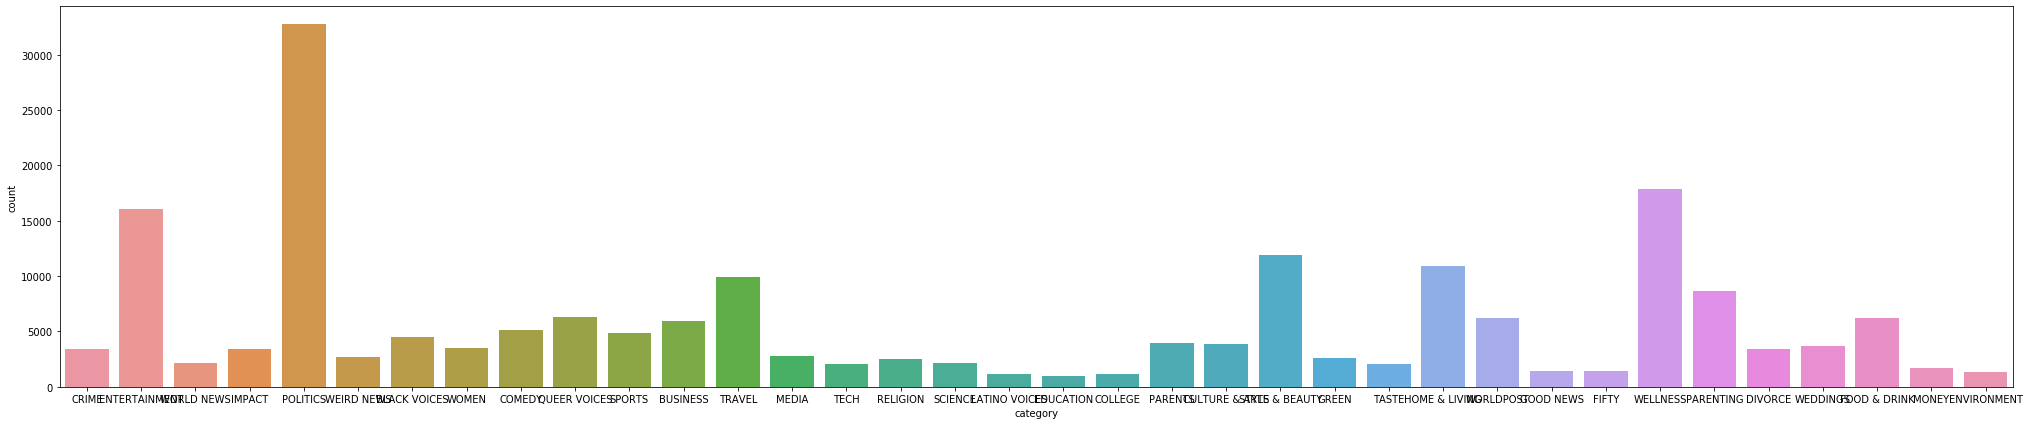

In [26]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(35,7))
sns.countplot(x = 'category', data = dataset_cp)

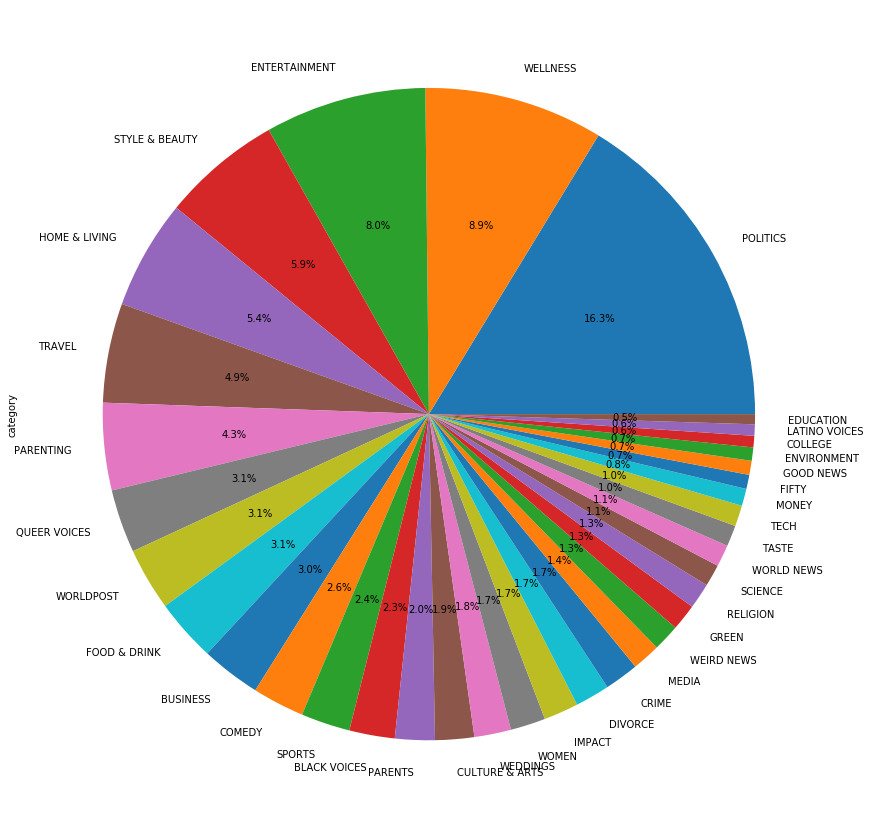

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
dataset_cp['category'].value_counts().plot.pie( autopct = '%1.1f%%')


In [28]:
dataset_cp['short_description'] = dataset_cp['short_description'].str.lower()

In [29]:
for i in range(len(dataset_cp["short_description"])):
    string = ""
    for word in dataset_cp["short_description"][i].split():
        ss = ("".join(e for e in word if e.isalnum()))
        if not ss in stop:
          string += ss + " "  
    dataset_cp.at[i,"short_description"] = string.strip()

In [30]:
for i in range(len(dataset_cp['short_description'])):
    string = ""
    for w in word_tokenize(dataset_cp['short_description'][i]):
        string += lemmatizer.lemmatize(w,pos='v') + " "
    dataset_cp.at[i,'short_description'] = string.strip()

In [31]:
dataset_cp['information'] = dataset_cp['headline'] + " " + dataset_cp['short_description']

In [32]:
dataset_cp.head()

,category,headline,authors,link,short_description,date,information
0,CRIME,2 mass shoot texas last week 1 tv,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,leave husband kill children another day america,2018-05-26,2 mass shoot texas last week 1 tv leave husban...
1,ENTERTAINMENT,smith join diplo nicky jam 2018 world cup offi...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,course song,2018-05-26,smith join diplo nicky jam 2018 world cup offi...
2,ENTERTAINMENT,hugh grant marry first time age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,actor longtime girlfriend anna eberstein tie k...,2018-05-26,hugh grant marry first time age 57 actor longt...
3,ENTERTAINMENT,jim carrey blast castrato adam schiff democrat...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,actor give dems asskicking fight hard enough d...,2018-05-26,jim carrey blast castrato adam schiff democrat...
4,ENTERTAINMENT,julianna margulies use donald trump poop bag p...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,dietland actress say use bag really cathartic ...,2018-05-26,julianna margulies use donald trump poop bag p...


In [33]:
for i in range(len(dataset_cp["authors"])):
        author_names = [x for x in dataset_cp['authors'][i].lower().replace('and',',').replace(' ', '').split(',') if x != '']
        dataset_cp.at[i,'authors'] = ''.join(author_names)


In [34]:
dataset_cp['sentence']= dataset_cp['information'] + " " + dataset_cp['authors']

In [35]:
xtrain,xtest,ytrain,ytest = train_test_split(dataset_cp['sentence'],dataset_cp['category'],test_size=0.33)

In [36]:

xtrain = np.array(xtrain);
xtest = np.array(xtest);
ytrain = np.array(ytrain);
ytest = np.array(ytest);
print(xtrain.shape)
print(xtest.shape)

(134571,)
(66282,)


In [37]:
vectorize = TfidfVectorizer(analyzer = "word", max_features=3000)
tfidftrain = vectorize.fit_transform(xtrain)
xtrain = tfidftrain.toarray()
tfidftest = vectorize.transform(xtest)
xtest = tfidftest.toarray()

In [38]:
print(len(xtrain))
print(len(xtest))

134571
66282


In [39]:
model = MultinomialNB(alpha=0.1)
model.fit(xtrain,ytrain)
Y_predict = model.predict(xtest)
accuracy = accuracy_score(ytest,Y_predict)*100
print(format(accuracy, '.2f'))

59.17


In [40]:
from sklearn.linear_model import LogisticRegression
logistic_Regression = LogisticRegression()
logistic_Regression.fit(xtrain,ytrain)
Y_predict = logistic_Regression.predict(xtest)
accuracy = accuracy_score(ytest,Y_predict)*100
print(format(accuracy, '.2f'))

C:\Users\NIRANJAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


63.52
